In [3]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use("ggplot")
sns.set()

### Auto-mpg Dataset
```
This is a modified version of original UGI Dataset
origin is a categorical feature, i.e., it is not a numerical representation
mpg(miles per gallon is a target variable)
Attribute Information:
    1. mpg: continuous
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. origin: multi-valued discrete
    8. size: continuous
```

In [5]:
df = pd.read_csv(r"datasets/auto_mpg.csv")
display(df.head())

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


# Dealing with categorical features
- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy variables'
    - 0: Observation was NOT that category
    - 1: Observation was that category

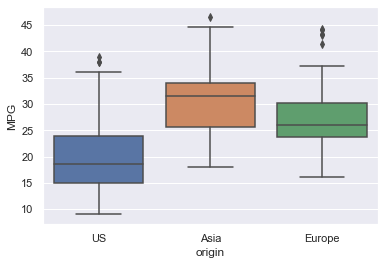

In [6]:
_ = sns.boxplot(x="origin", y="mpg", data=df)
_ = plt.xlabel("origin")
_ = plt.ylabel("MPG")
plt.show()

In [7]:
# Encoding dummy variables
df_origin = pd.get_dummies(df)
print(df_origin.head())
# Now we have three new binary features.
# Names of features will be previous_name+"_"+value

    mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  


In [8]:
# We can drop Asia as having neither US and Europe implies Asia, i.e. Asia is a redundant feature.
df_origin = df_origin.drop("origin_Asia", axis=1)
print(df_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


In [9]:
# Alternatively for above two cells
df_origin = pd.get_dummies(df, drop_first=True)
print(df_origin.head())
X = df_origin.drop("mpg", axis=1).values
y = df_origin["mpg"].values

    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)
print(ridge_cv)

[0.75266962 0.66042411 0.64245192 0.70017383 0.69141599]


## Handling the missing data

In [11]:
df = pd.read_csv(r"datasets/diabetes.csv")
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values
display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

``` We see from df.info that all features have non null value but data can be 0,-1 or anything implying missing data.
Printing df.head() shows that some data have zero skin thickness and insulin which have no practical significance. Therfore this data is missing.```

In [12]:
# Replacing all ? with nan: df[df=='?']=np.nan
# Number of nan in each feature: df.isnull().sum()
# Drop nan rows: df=df.dropna()
df.Insulin.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [13]:
# Dropping the missing data results in much lossing of data.
# Therefore dropping is optimal only if some data is missing.
df = df.dropna()
df.shape

(393, 9)

## Imputing the data and Pipelining

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
logreg = LogisticRegression()
steps = [("imputation", imp), ("logistic_regression", logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7402597402597403

## Centering and scaling the data

- ### Why scale the data
    - Many models use some form of distance to inform them
    - Features on larger scales can unduly inuence the model
    - Example: k-NN uses distance explicitly when making predictions
    - We want features to be on a similar scale
    - Normalizing (or scaling and centering)
- ### Ways to normalize the data
    - Standardization: Subtract the mean and divide by variance
    - All features are centered around zero and have variance one
    - Can also subtract the minimum and divide by the range
    - Minimum zero and maximum one
    - Can also normalize so the data ranges from -1 to +1
    - See scikit-learn docs for further details

In [15]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

# Before normalizing
print(np.mean(X), np.std(X))

# Before normalizing
# Mean is now zero and std=1
print(np.mean(X_scaled), np.std(X_scaled))

44.98579117838542 58.37297131925462
8.86154575644819e-17 1.0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7272727272727273


In [17]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))
# We see that normalization indeed improved the results!

0.6623376623376623


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 38}
0.6883116883116883
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        94
           1       0.75      0.30      0.43        60

    accuracy                           0.69       154
   macro avg       0.71      0.62      0.61       154
weighted avg       0.71      0.69      0.65       154

